<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

## Deep Learning Frameworks
- Google => Tensorflow
- Meta => PyTorch
- Apache => MXNet
- ONNX
- Mindspace
- AWS => Neuron

1. Dataset
2. Split the dataset (training and testing)
3. Define the neural network architecture - Number of layers, Number of neurons, Input and Putput layers, Activation Functions, Loss, Optimizer
4. Train
5. Evaluate
6. Predictions

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Loading dataset

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

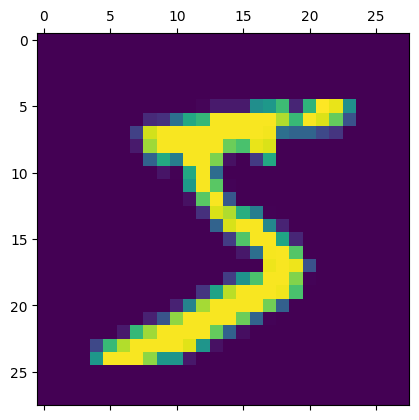

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
## Normalization
X_train = X_train/255 #255/255=1, 0/255=0
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
28*28

784

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 784) # (60000,784)
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened = X_test.reshape(len(X_test), 784)
X_test_flattened.shape

(10000, 784)

In [16]:
# Simple neural network with no hidden layers
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

c:\Users\Ganesh\anaconda3\envs\genai\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.fit(X_train_flattened, y_train, epochs=5, batch_size=16)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 863us/step - accuracy: 0.8487 - loss: 0.6148
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - accuracy: 0.8939 - loss: 0.3902
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step - accuracy: 0.9020 - loss: 0.3547
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 896us/step - accuracy: 0.9067 - loss: 0.3365
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - accuracy: 0.9097 - loss: 0.3246


In [18]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test)
print("Accuracy of test data:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9153 - loss: 0.3056 
Accuracy of test data: 0.9153000116348267


In [19]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


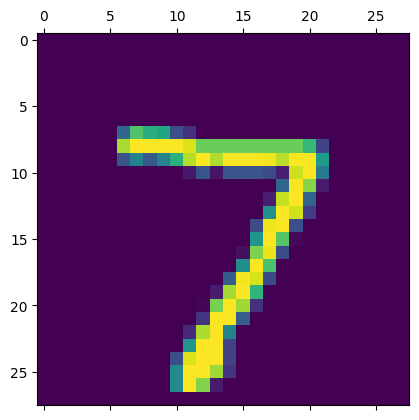

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted[0]

array([6.9312751e-05, 1.2122537e-07, 1.4283165e-04, 1.7779588e-03,
       1.3272092e-05, 4.4679320e-05, 4.8003119e-07, 9.9658585e-01,
       9.0200418e-05, 1.2751870e-03], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(y_pred) for y_pred in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    1,    4,    9,    1,    3,    0],
       [   0, 1106,    2,    2,    1,    2,    4,    2,   16,    0],
       [  11,    8,  900,   14,   15,    1,   15,   18,   40,   10],
       [   4,    1,   21,  901,    1,   37,    3,   13,   17,   12],
       [   2,    3,    3,    1,  911,    0,    9,    2,    8,   43],
       [  11,    3,    3,   29,   10,  775,   17,    7,   28,    9],
       [  11,    3,    3,    2,   13,   12,  911,    1,    2,    0],
       [   2,   11,   22,    6,    8,    0,    0,  940,    4,   35],
       [   7,   10,    9,   20,    8,   27,   13,   15,  850,   15],
       [  11,    7,    3,   10,   39,    8,    0,   23,    7,  901]])>

Text(50.722222222222214, 0.5, 'Actual/GroundTruths')

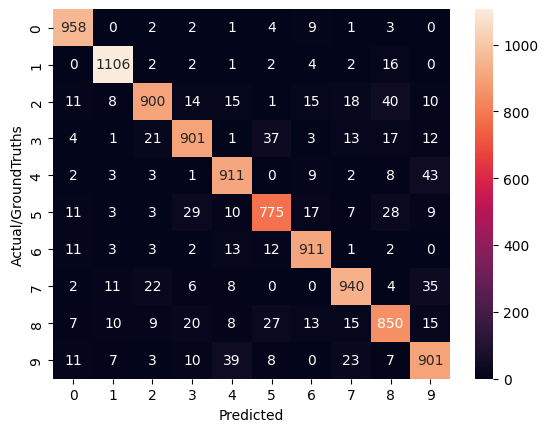

In [30]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual/GroundTruths")

In [31]:
# Simple neural network with one hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattened, y_train, epochs=5,batch_size=16)

Epoch 1/5


c:\Users\Ganesh\anaconda3\envs\genai\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8668 - loss: 0.5054
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9225 - loss: 0.2748
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9363 - loss: 0.2273
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9450 - loss: 0.1959
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9518 - loss: 0.1735


In [32]:
test_loss,test_accuracy = model.evaluate(X_test_flattened, y_test)
test_loss,test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9523 - loss: 0.1602   


(0.1601855605840683, 0.9523000121116638)

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(y_pred) for y_pred in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [36]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    1,    1,    3,    9,    1,    2,    1],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   7,    1,  980,    6,    8,    1,    8,    8,   11,    2],
       [   0,    0,   16,  950,    0,   12,    2,    9,   14,    7],
       [   1,    1,    6,    0,  932,    0,   13,    1,    3,   25],
       [   9,    2,    1,   12,    1,  829,   17,    2,   13,    6],
       [   7,    3,    2,    1,    6,    7,  929,    1,    2,    0],
       [   1,    8,   20,    6,    7,    1,    0,  955,    1,   29],
       [   3,    2,    4,   11,    6,    5,   14,    9,  916,    4],
       [   6,    7,    1,    9,   17,    1,    1,    6,    8,  953]])>

Text(50.722222222222214, 0.5, 'Actual/GroundTruths')

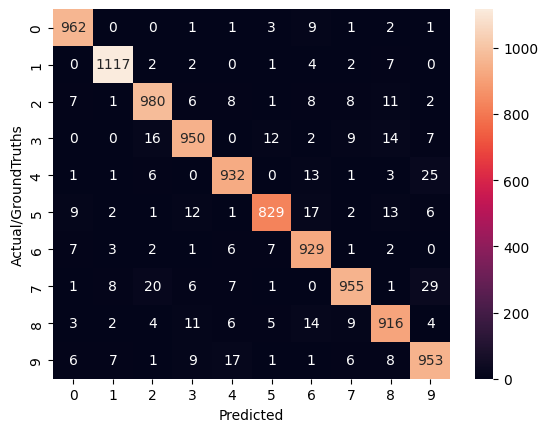

In [38]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual/GroundTruths")

In [ ]:
# Other optimizers
1. SGD
2. RMSProp
3. Adam (performant)

In [39]:
# Simple neural network with one hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattened, y_train, epochs=5,batch_size=16)

Epoch 1/5


c:\Users\Ganesh\anaconda3\envs\genai\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9294 - loss: 0.2425
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9689 - loss: 0.1055
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9782 - loss: 0.0736
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9825 - loss: 0.0557
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9861 - loss: 0.0438


In [40]:
test_loss,test_accuracy = model.evaluate(X_test_flattened, y_test)
test_loss,test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9773 - loss: 0.0764   


(0.0764155387878418, 0.9772999882698059)

In [41]:
# Simple neural network with one hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Input layer
    keras.layers.Dense(100,activation="relu"), # Hidden layer
    keras.layers.Dense(10,activation="softmax") # Output layer
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train, y_train, epochs=5,batch_size=16)

Epoch 1/5


c:\Users\Ganesh\anaconda3\envs\genai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9284 - loss: 0.2466
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9668 - loss: 0.1098
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9764 - loss: 0.0756
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9825 - loss: 0.0581
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9855 - loss: 0.0458


In [ ]:
# No hidden layers + SGD
# Added 1 hidden layer + SGD
# Added 1 hidden layer + Adam
# Added 2 hidden layer + Adam => assignment

# Add more hidden layers and more complex networks =?